## Entendimiento de los datos

A continuación se presenta un poco de análisis exploratorio en base a 2 datasets para comprender un poco más la data y como podía ser analizada

In [57]:
import pandas as pd
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import numpy as np

In [58]:
carpeta1 = r'data\TourDeFranceWinners'
carpeta2 = r'data\TourDeFranceDataset'

In [59]:
archivos_excel1 = glob.glob(os.path.join(carpeta1, "*.csv"))
archivos_excel2 = glob.glob(os.path.join(carpeta2, "*.csv"))
display(archivos_excel1)
display(archivos_excel2)

['data\\TourDeFranceWinners\\stage_data.csv',
 'data\\TourDeFranceWinners\\tdf_stages.csv',
 'data\\TourDeFranceWinners\\tdf_winners.csv']

['data\\TourDeFranceDataset\\TDFF_Riders_History.csv',
 'data\\TourDeFranceDataset\\TDFF_Stages_History.csv',
 'data\\TourDeFranceDataset\\TDF_Riders_History.csv',
 'data\\TourDeFranceDataset\\TDF_Stages_History.csv']

A continuación se analiza el dataset completo de **TourDeFranceWinners** donde tenemos 3 dataframes, uno para Etapas (Stages), otro para los ganadores de las etapas, y el último con las características físicas y tiempos de cada ganador. Primero se procedió a filtrar estos dataframes desde el año 1962 en adelante debido a que desde ese año el Tour de France ha mantenido el mismo formato de competición.

In [60]:
stage_data = pd.read_csv(archivos_excel1[0])
stage_data = stage_data[stage_data['year'] >= 1962]
stage_data

,edition,year,stage_results_id,rank,time,rider,age,team,points,elapsed,bib_number
66833,49,1962,stage-1,1,33S,Altig Rudi,25.0,NaN,100.0,33S,NaN
66834,49,1962,stage-1,2,0S,Darrigade André,33.0,NaN,70.0,33S,NaN
66835,49,1962,stage-1,3,0S,Van Looy Rik,28.0,NaN,50.0,33S,NaN
66836,49,1962,stage-1,4,0S,Hoevenaers Jos,29.0,NaN,40.0,33S,NaN
66837,49,1962,stage-1,5,0S,Carlesi Guido,25.0,NaN,32.0,33S,NaN
...,...,...,...,...,...,...,...,...,...,...,...
255747,106,2019,stage-21,151,30S,Bennett George,29.0,NaN,NaN,38S,NaN
255748,106,2019,stage-21,152,30S,Scully Tom,29.0,NaN,NaN,38S,NaN
255749,106,2019,stage-21,153,0S,Naesen Oliver,28.0,NaN,NaN,8S,NaN
255750,106,2019,stage-21,154,0S,Tratnik Jan,29.0,NaN,NaN,8S,NaN


In [61]:
tdf_stages = pd.read_csv(archivos_excel1[1])
tdf_stages['Date'] = pd.to_datetime(tdf_stages['Date'])
tdf_stages = tdf_stages[tdf_stages['Date'] >= "1962-01-01"]
tdf_stages

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA
...,...,...,...,...,...,...,...,...
1291,18,1962-07-11,241.5,Antibes,Briançon,Stage with mountain(s),Emile Daems,BEL
1292,19,1962-07-12,204.5,Briançon,Aix-les-Bains,Stage with mountain(s),Raymond Poulidor,FRA
1293,20,1962-07-13,68.0,Bourgoin,Lyon,Individual time trial,Jacques Anquetil,FRA
1294,21,1962-07-14,232.0,Lyon,Nevers,Plain stage,Dino Bruni,ITA


In [62]:
tdf_winners = pd.read_csv(archivos_excel1[2])
tdf_winners['start_date'] = pd.to_datetime(tdf_winners['start_date'])
tdf_winners = tdf_winners[tdf_winners['start_date'] >= "1962-01-01"].reset_index(drop=True)
tdf_winners.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,49,1962-06-24,Jacques Anquetil,Saint-Raphaël–Helyett–Hutchinson,4274.0,114.531667,0.067778,2,3,1.76,70.0,28,1934-01-08,1987-11-18,NaN,"Monsieur Chrono, Maître Jacques",Mont-Saint-Aignan,France,France
1,50,1963-06-23,Jacques Anquetil,Saint-Raphaël–Gitane–R. Geminiani,4138.0,113.501389,0.050833,4,5,1.76,70.0,29,1934-01-08,1987-11-18,NaN,"Monsieur Chrono, Maître Jacques",Mont-Saint-Aignan,France,France
2,51,1964-06-22,Jacques Anquetil,Saint-Raphaël–Gitane–Dunlop,4504.0,127.162222,0.015278,4,6,1.76,70.0,30,1934-01-08,1987-11-18,NaN,"Monsieur Chrono, Maître Jacques",Mont-Saint-Aignan,France,France
3,52,1965-06-22,Felice Gimondi,Salvarani,4188.0,116.701667,0.033889,3,18,1.81,71.0,22,1942-09-29,2019-08-16,NaN,The Phoenix,Sedrina,Italy,Italy
4,53,1966-06-21,Lucien Aimar,Ford France–Hutchinson,4329.0,117.572500,0.016944,0,6,NaN,NaN,25,1941-04-28,NaN,NaN,NaN,Hyères,France,France


Luego de ver un poco el formato de los datos se procede a analizar más a detalle sobre los ganadores, etapas, DNFs y lo que se encuentre necesario para poder analizar a la competencia y ver posibles campos de mejora.

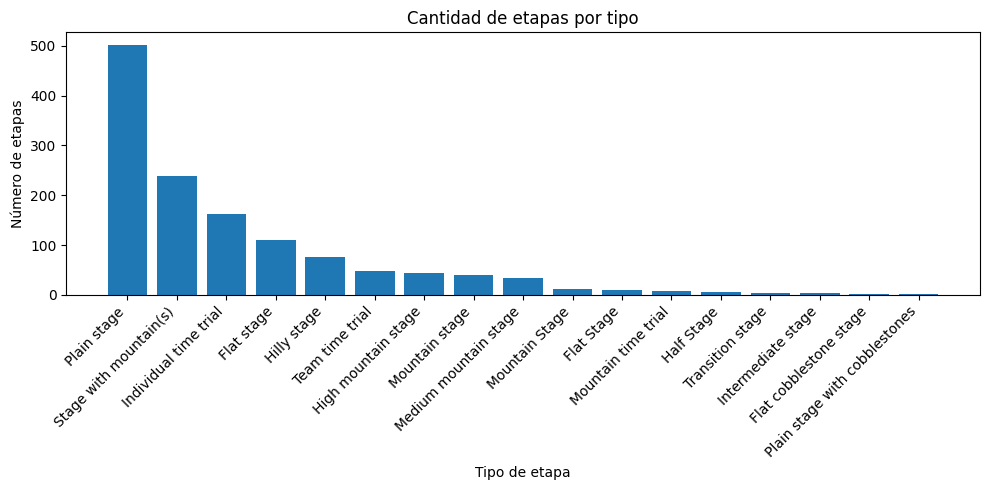

In [64]:
tipo_conteo = tdf_stages['Type'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(tipo_conteo.index.astype(str), tipo_conteo.values)
plt.title('Cantidad de etapas por tipo')
plt.xlabel('Tipo de etapa')
plt.ylabel('Número de etapas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Por acá se presentan los tipos de competición que estpan presentes en más etapas, siendo estas Plain Stage, Stage with mountains e Individual time trial

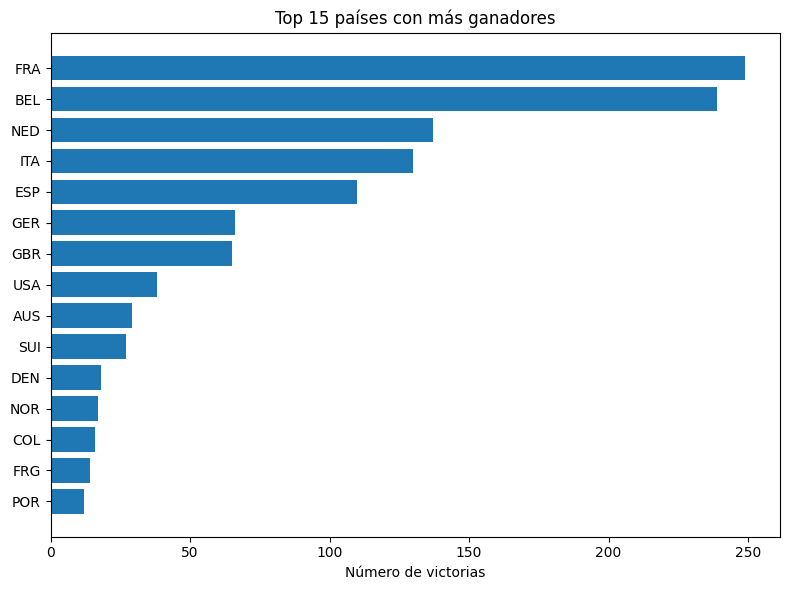

In [65]:
topN = 15
paises = tdf_stages['Winner_Country'].value_counts().head(topN).sort_values()

plt.figure(figsize=(8,6))
plt.barh(paises.index.astype(str), paises.values)
plt.title(f'Top {topN} países con más ganadores')
plt.xlabel('Número de victorias')
plt.tight_layout()
plt.show()


También podemos ver los países más ganadores donde los sobresalientes son Francia y Bélgica, seguidos ya más abajo por Países Bajos, Italia y España.

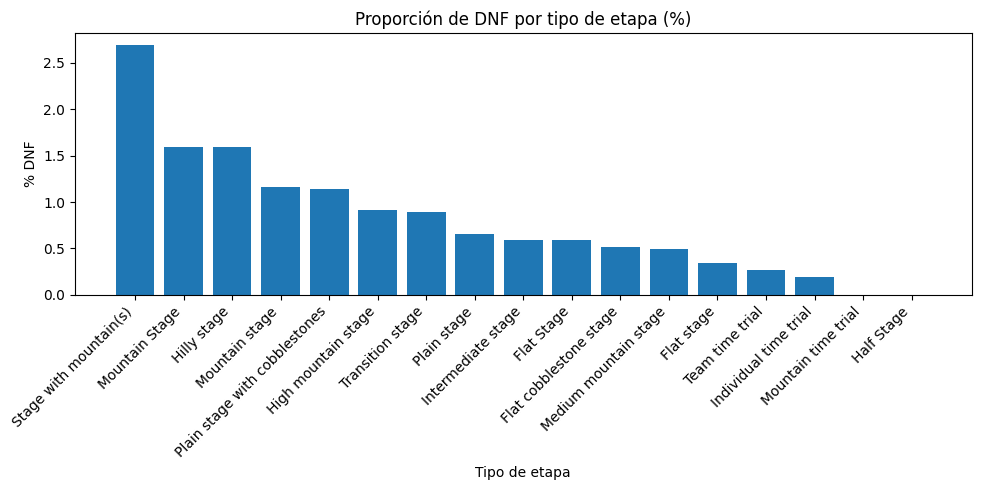

In [ ]:
s = stage_data['stage_results_id'].astype(str).str.lower()
stage_data['stage_num'] = pd.to_numeric(s.str.extract(r'(\d+)')[0], errors='coerce')

tdf_stages['year'] = pd.to_datetime(tdf_stages['Date']).dt.year
t = tdf_stages['Stage'].astype(str).str.lower()
tdf_stages['stage_num'] = pd.to_numeric(t.str.extract(r'(\d+)')[0], errors='coerce')

cols_keep = ['year','stage_num','Type']
merged = stage_data.merge(tdf_stages[cols_keep].drop_duplicates(),
                          on=['year','stage_num'], how='inner')

merged['rank_str'] = merged['rank'].astype(str)
resumen = (merged
           .groupby('Type')
           .agg(total=('rank_str','size'),
                dnfs=('rank_str', lambda x: (x=='DNF').sum()))
           .reset_index())
resumen['pct_dnf'] = resumen['dnfs'] / resumen['total'] * 100

resumen = resumen.sort_values('pct_dnf', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(resumen['Type'].astype(str), resumen['pct_dnf'].values)
plt.title('Proporción de DNF por tipo de etapa (%)')
plt.xlabel('Tipo de etapa')
plt.ylabel('% DNF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Acá podemos ver la proporción donde hay mayores DNF según el tipo de etapa, por lo que podemos asumir que la etapa Stage with mountains es de las más complicadas, seguida por Mountain Stage y Hilly Stage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

s = stage_data['stage_results_id'].astype(str).str.lower()
stage_data['stage_num'] = pd.to_numeric(s.str.extract(r'(\d+)')[0], errors='coerce')

t = tdf_stages['Stage'].astype(str).str.lower()
tdf_stages['stage_num'] = pd.to_numeric(t.str.extract(r'(\d+)')[0], errors='coerce')
tdf_stages['year'] = pd.to_datetime(tdf_stages['Date']).dt.year

ganadores = stage_data[stage_data['rank'].astype(str) == '1']

ganadores_merge = ganadores.merge(
    tdf_stages[['year', 'stage_num', 'Type', 'Winner_Country']],
    on=['year', 'stage_num'],
    how='inner'
)

victorias_pais_etapa_tipo = (ganadores_merge
                             .groupby(['Winner_Country', 'stage_num', 'Type'])
                             .size()
                             .reset_index(name='Victorias'))

victorias_pais_etapa_tipo = victorias_pais_etapa_tipo.sort_values('Victorias', ascending=False)

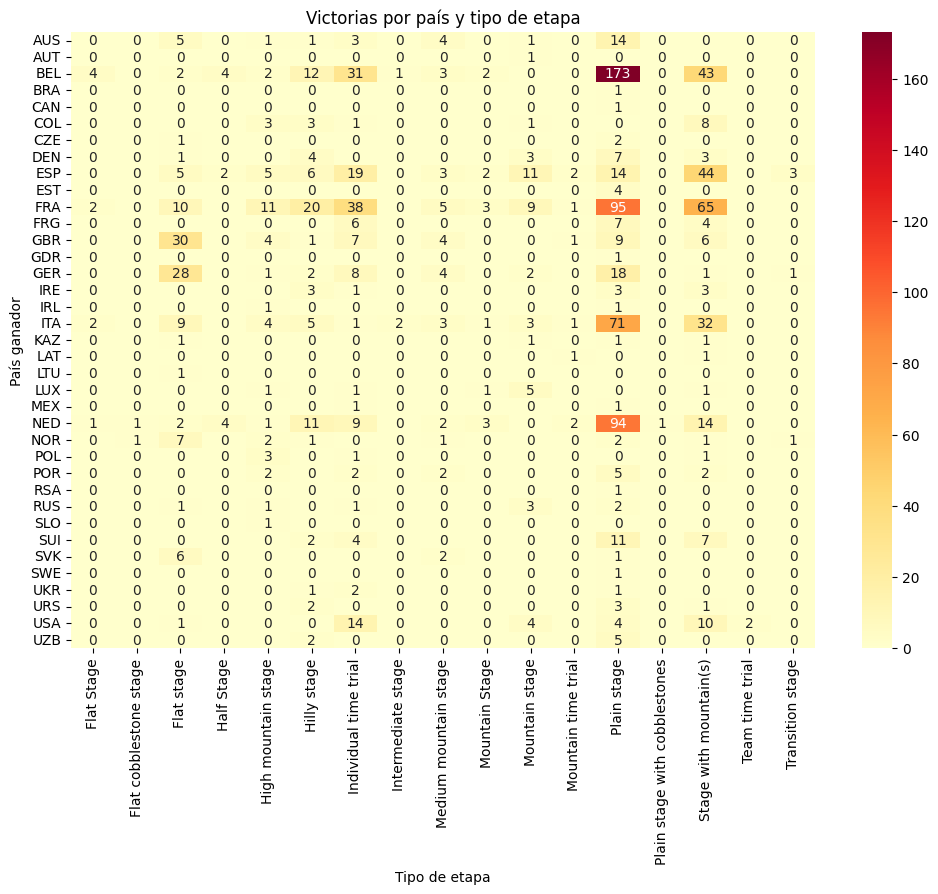

In [68]:
tabla_heat_tipo = victorias_pais_etapa_tipo.pivot_table(
    index='Winner_Country',
    columns='Type',
    values='Victorias',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12,8))
sns.heatmap(tabla_heat_tipo, cmap="YlOrRd", annot=True, fmt='d')
plt.title('Victorias por país y tipo de etapa')
plt.xlabel('Tipo de etapa')
plt.ylabel('País ganador')
plt.show()

Con ese previo análisis ya realizamos una combinatoria de que países son los que han ganado cierto tipo de etapas. Con ello podemos ver quue la mayoría de victorias se encuentran en la etapa Plain Stage, siendo Bélgica el pais más ganador seguido de Francia, Paises Bajos e Italia.

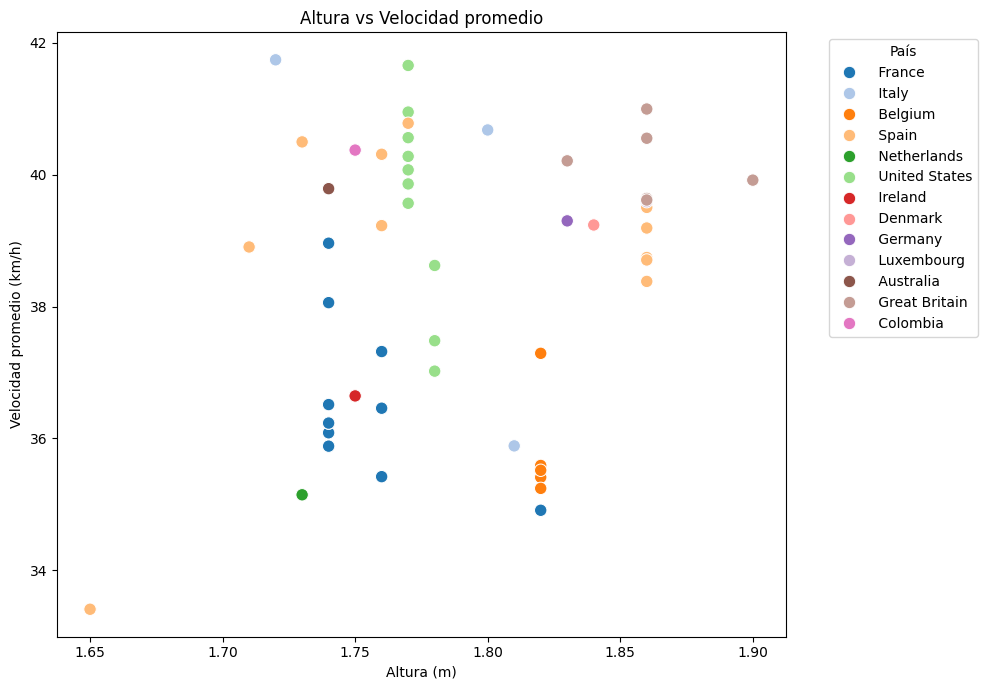

In [ ]:
tdf_winners['velocidad'] = tdf_winners['distance'] / tdf_winners['time_overall']

df_plot = tdf_winners.dropna(subset=['height', 'velocidad', 'nationality'])

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_plot,
    x='height',
    y='velocidad',
    hue='nationality',    
    palette='tab20',
    s=80
)

plt.title('Altura vs Velocidad promedio')
plt.xlabel('Altura (m)')
plt.ylabel('Velocidad promedio (km/h)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


De último para este dataset se quiso realizar una comparación entre la altura del ciclista versus su velocidad promedio y podemos ver que no en todos los casos los más altos fueron los más rápidos sino esta bastante disperso, aunque cabe destacar que los deportistas de Estados Unidos fueron de los más rápidos ta que están bastante parejos teniendo una estatura proimedio entre 1.75 y 1.80 metros. Y con ello podemos ver que a pesar de tener a varios del equipo siendo bastante rápidos, casi parejos, no han destacado en los primeros lugares.

Por último se realizó un pequeño análisis del dataset **TourDeFranceWinners** donde para cambiar un poco el enfoque se tomo data de las mujeres participantes del Tour de France aunque no hayan demasiados datos.

In [70]:
ff_riders_data = pd.read_csv(archivos_excel2[0])
ff_riders_data = ff_riders_data.drop(columns=['Unnamed: 0'])
ff_riders_data = ff_riders_data[ff_riders_data['Year'] >= 1962]
ff_riders_data

,Rank,Rider,Rider No.,Team,Times,Gap,B,P,Year,Distance (km),Number of stages,TotalSeconds,GapSeconds,ResultType
0,1,ANNEMIEK VAN VLEUTEN,11,MOVISTAR TEAM WOMEN,26h 55' 44'',-,23',NaN,2022,1029,8,96944,0,time
1,2,DEMI VOLLERING,21,TEAM SD WORX,26h 59' 32'',+ 00h 03' 48'',14',NaN,2022,1029,8,97172,228,time
2,3,KATARZYNA NIEWIADOMA,61,CANYON // SRAM RACING,27h 02' 19'',+ 00h 06' 35'',06',NaN,2022,1029,8,97339,395,time
3,4,JULIETTE LABOUS,51,TEAM DSM,27h 03' 12'',+ 00h 07' 28'',NaN,NaN,2022,1029,8,97392,448,time
4,5,SILVIA PERSICO,104,VALCAR - TRAVEL & SERVICE,27h 03' 44'',+ 00h 08' 00'',10',NaN,2022,1029,8,97424,480,time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,119,ANTRI CHRISTOFOROU,154,HUMAN POWERED HEALTH,27h 09' 01'',+ 01h 51' 26'',NaN,NaN,2023,956,8,97741,6686,time
228,120,TYPHAINE LAURANCE,183,LIFEPLUS WAHOO,27h 09' 24'',+ 01h 51' 49'',NaN,NaN,2023,956,8,97764,6709,time
229,121,JOSIE NELSON,217,TEAM COOP-HITEC PRODUCTS,27h 10' 14'',+ 01h 52' 39'',NaN,NaN,2023,956,8,97814,6759,time
230,122,JOSIE TALBOT,167,COFIDIS WOMEN TEAM,27h 13' 36'',+ 01h 56' 01'',NaN,NaN,2023,956,8,98016,6961,time


In [71]:
ff_history_data = pd.read_csv(archivos_excel2[1])
ff_history_data = ff_history_data.drop(columns=['Unnamed: 0'])
ff_history_data = ff_history_data[ff_history_data['Year'] >= 1962]
ff_history_data

,Year,TotalTDFDistance,Stage
0,2022,1029,Stage 1 : Paris Tour Eiffel > Champs-Élysées
1,2022,1029,Stage 2 : Meaux > Provins
2,2022,1029,Stage 3 : Reims > Épernay
3,2022,1029,Stage 4 : Troyes > Bar-sur-Aube
4,2022,1029,Stage 5 : Bar-le-Duc > Saint-Dié-des-Vosges
5,2022,1029,Stage 6 : Saint-Dié-des-Vosges > Rosheim
6,2022,1029,Stage 7 : Sélestat > Le Markstein Fellering
7,2022,1029,Stage 8 : Lure > La Super Planche des Belles F...
8,2023,956,Stage 1 : CLERMONT-FERRAND > CLERMONT-FERRAND
9,2023,956,Stage 2 : CLERMONT-FERRAND > MAURIAC


Como se observa destacan casi solo datos del 2022 y 2023 por lo que se procedió a una comparación de años donde las top 10 de ambos años mantuvieron tiempos parejos de un poco más de 25 horas, por lo que fue bastante competitivo.

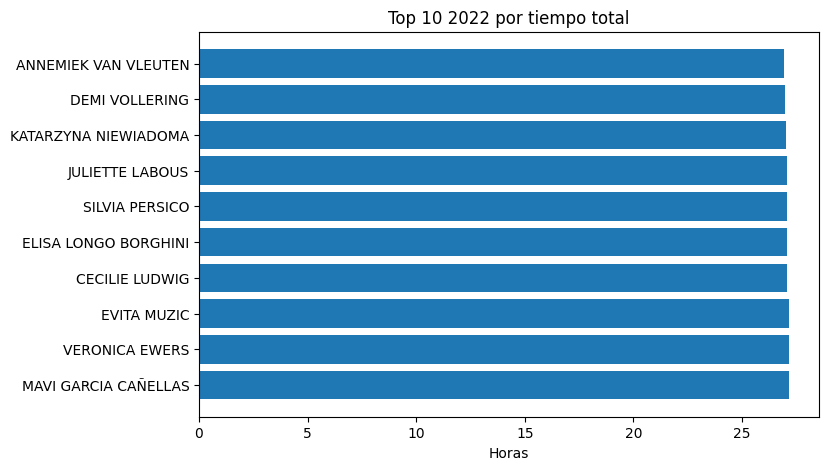

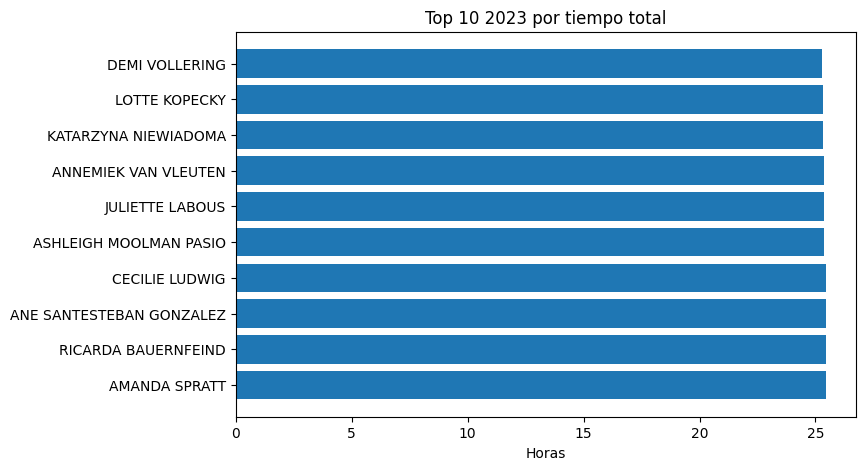

In [72]:
import matplotlib.pyplot as plt

for year in [2022, 2023]:
    top10 = ff_riders_data[ff_riders_data['Year'] == year].nsmallest(10, 'TotalSeconds')
    plt.figure(figsize=(8,5))
    plt.barh(top10['Rider'], top10['TotalSeconds']/3600)
    plt.title(f'Top 10 {year} por tiempo total')
    plt.xlabel('Horas')
    plt.gca().invert_yaxis()
    plt.show()


Con ello también podemos ver que el Gap no supera las 0.25 horas, siendo alrededor de 15 minutos

C:\Users\lijv1.LINDA_HP\AppData\Local\Temp\ipykernel_33644\3595003597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['Gap_horas'] = df2022['GapSeconds'] / 3600


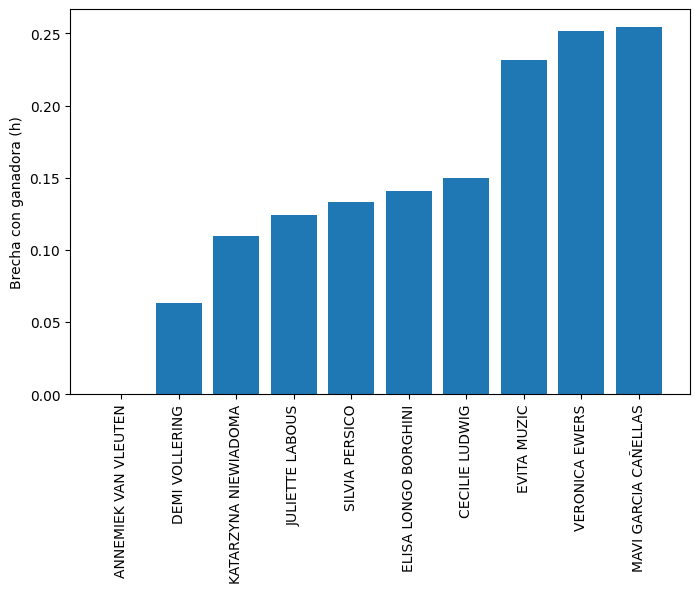

In [73]:
df2022 = ff_riders_data[ff_riders_data['Year'] == 2022]
df2022['Gap_horas'] = df2022['GapSeconds'] / 3600
plt.figure(figsize=(8,5))
plt.bar(df2022['Rider'][:10], df2022['Gap_horas'][:10])
plt.xticks(rotation=90)
plt.ylabel('Brecha con ganadora (h)')
plt.show()


Por último en la velocidad promedio de la ganadora de ambos años se puede ver que disminuyo a penas 0.4 km/h, lo que nos dice que en 2 años los resultados y desempeño de las ciclistas  a sido demasiado pareja, tomando en cuenta que igual siempre hay poca data que analizar.

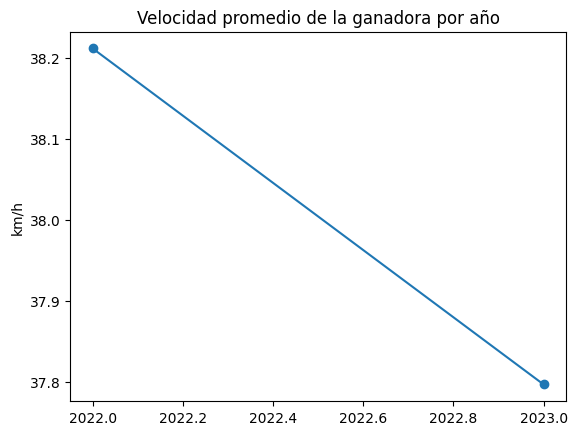

In [74]:
ganadoras = ff_riders_data.groupby('Year').first().reset_index()
ganadoras['velocidad'] = ganadoras['Distance (km)'] / (ganadoras['TotalSeconds']/3600)
plt.plot(ganadoras['Year'], ganadoras['velocidad'], marker='o')
plt.ylabel('km/h')
plt.title('Velocidad promedio de la ganadora por año')
plt.show()
